<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('/Users/jonathanyirrell/Desktop/GA/DSI25-lessons/projects/project-2/sat_scores.csv', newline='') as csvfile:
    data = csv.DictReader(csvfile)
    datalist = list(data)
print(datalist)


[{'State': 'CT', 'Rate': '82', 'Verbal': '509', 'Math': '510'}, {'State': 'NJ', 'Rate': '81', 'Verbal': '499', 'Math': '513'}, {'State': 'MA', 'Rate': '79', 'Verbal': '511', 'Math': '515'}, {'State': 'NY', 'Rate': '77', 'Verbal': '495', 'Math': '505'}, {'State': 'NH', 'Rate': '72', 'Verbal': '520', 'Math': '516'}, {'State': 'RI', 'Rate': '71', 'Verbal': '501', 'Math': '499'}, {'State': 'PA', 'Rate': '71', 'Verbal': '500', 'Math': '499'}, {'State': 'VT', 'Rate': '69', 'Verbal': '511', 'Math': '506'}, {'State': 'ME', 'Rate': '69', 'Verbal': '506', 'Math': '500'}, {'State': 'VA', 'Rate': '68', 'Verbal': '510', 'Math': '501'}, {'State': 'DE', 'Rate': '67', 'Verbal': '501', 'Math': '499'}, {'State': 'MD', 'Rate': '65', 'Verbal': '508', 'Math': '510'}, {'State': 'NC', 'Rate': '65', 'Verbal': '493', 'Math': '499'}, {'State': 'GA', 'Rate': '63', 'Verbal': '491', 'Math': '489'}, {'State': 'IN', 'Rate': '60', 'Verbal': '499', 'Math': '501'}, {'State': 'SC', 'Rate': '57', 'Verbal': '486', 'Math':

In [3]:
# create lists for values for each key for dictionary
state=[]
rate=[]
verbal = []
math = []

#create dictionary
satdict = {'state': state, 'rate': rate, 'verbal': verbal, 'math': math}

In [4]:
#get values for 'State' and enter into list which will feed dict
for d in datalist:
    state.append(d.get('State'))

In [5]:
#get values for 'Rate' and enter into list which will feed dict
for d in datalist:
    rate.append(float(d.get('Rate')))

In [6]:
#get values for 'Verbal' and enter into list which will feed dict
for d in datalist:
    verbal.append(float(d.get('Verbal')))

In [7]:
#get values for 'Math' and enter into list which will feed dict
for d in datalist:
    math.append(float(d.get('Math')))

In [8]:
#print dict
print(satdict)

{'state': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [9]:
satdf = pd.DataFrame.from_dict(satdict)
satdf.head()

,state,rate,verbal,math
0,CT,82.0,509.0,510.0
1,NJ,81.0,499.0,513.0
2,MA,79.0,511.0,515.0
3,NY,77.0,495.0,505.0
4,NH,72.0,520.0,516.0


In [10]:
sats = pd.read_csv('/Users/jonathanyirrell/Desktop/GA/DSI25-lessons/projects/project-2/sat_scores.csv')
sats.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [11]:
satdf.dtypes

state      object
rate      float64
verbal    float64
math      float64
dtype: object

In [12]:
sats.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [13]:
sats.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

Because the values from the SAT dictionary have had to be converted to float - and cannot convert to int - they are of type float rather than integer

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [15]:
sats.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [16]:
sats.describe(include = 'all')

,State,Rate,Verbal,Math
count,52,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN
top,CT,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000
std,NaN,27.301788,33.236225,36.014975
min,NaN,4.000000,482.000000,439.000000
25%,NaN,9.000000,501.000000,504.000000
50%,NaN,33.500000,526.500000,521.000000
75%,NaN,63.500000,562.000000,555.750000


In [17]:
sats.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

Data seems to be of mean SAT scores and rate of participation per state for a particular year.  Scores are broken down into verbal and maths

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [18]:
sats.shape

(52, 4)

In [19]:
list(sats.dtypes.values)

[dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]

In [20]:
columndescription = {'State': 'Name of State', 'Rate' : 'Percentage of students sitting sats', 'Verbal':'mean score for verbal test', 'Math' :'mean individual score for maths test'}

datadictionary = {"columns": list(sats.columns.values), "coltypes": list(sats.dtypes.values), "desciption": columndescription, "dfshape": sats.shape}

In [21]:
print(datadictionary)

{'columns': ['State', 'Rate', 'Verbal', 'Math'], 'coltypes': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')], 'desciption': {'State': 'Name of State', 'Rate': 'Percentage of students sitting sats', 'Verbal': 'mean score for verbal test', 'Math': 'mean individual score for maths test'}, 'dfshape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


#update default settings
sns.set(font_scale=1.5)  
#increase font size
%config InlineBackend.figure_format = 'retina' 
#update screen settings
%matplotlib inline 
#defaults matplotlib to plot inline 

In [1]:
rate = sats.Rate
math = sats.Math
verbal = sats.Verbal

fix, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12,16))

sns.distplot(rate, bins = 10, kde=False, ax = ax[0])
sns.distplot(math, bins = 10, kde=False, ax = ax[1])
sns.distplot(verbal, bins = 10, kde=False, ax = ax[2]);

NameError: name 'sats' is not defined

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

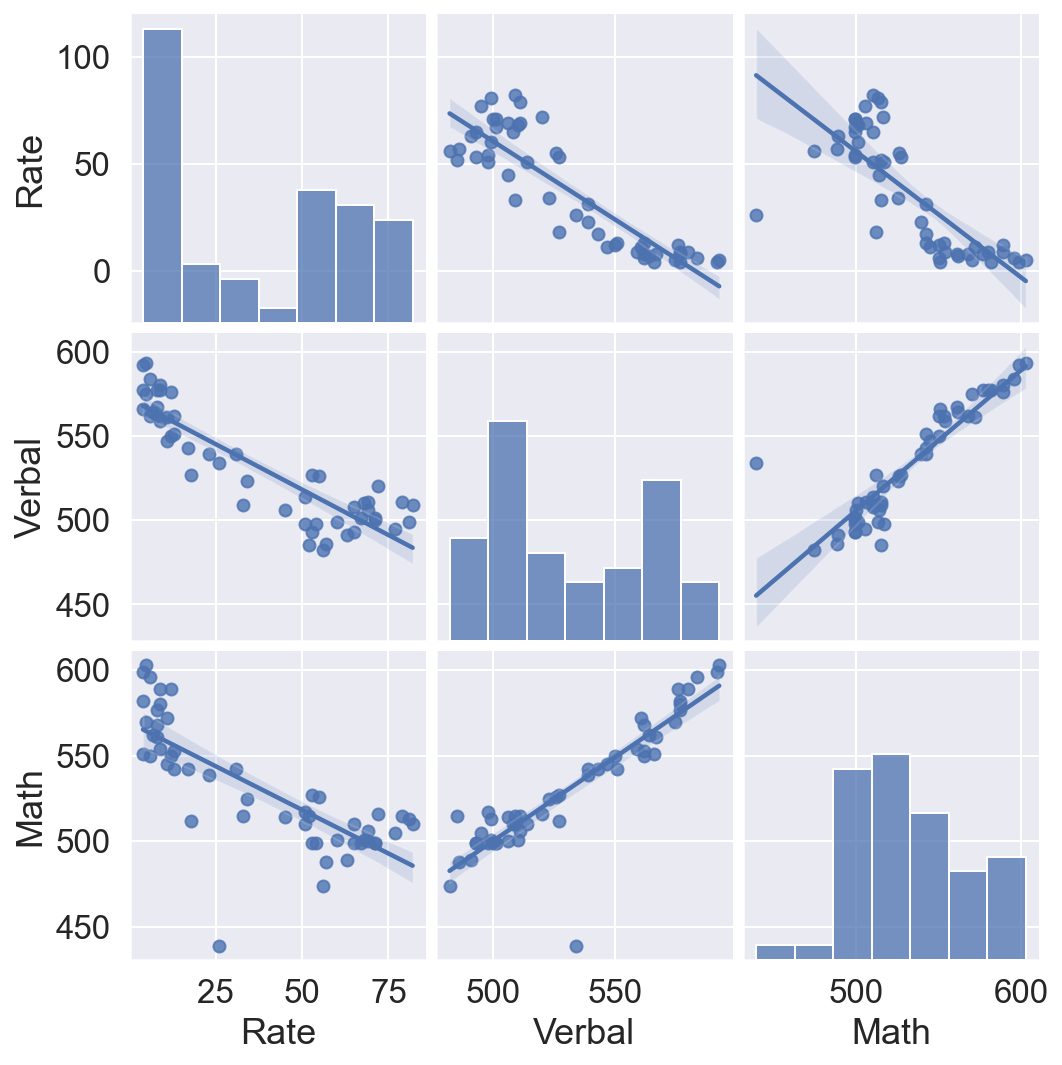

In [24]:
sns.pairplot(sats, kind = 'reg')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<Figure size 576x288 with 0 Axes>

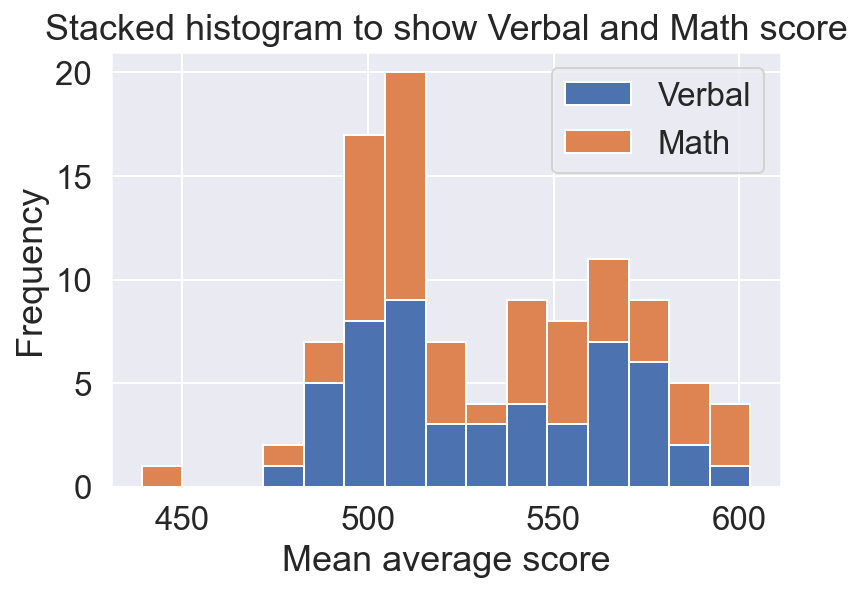

In [25]:
fig = plt.figure(figsize=(8, 4))
sats[['Verbal','Math']].plot.hist(stacked = True, bins = 15)
plt.title('Stacked histogram to show Verbal and Math score')
plt.xlabel('Mean average score')
plt.ylabel('Frequency');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

<Figure size 576x288 with 0 Axes>

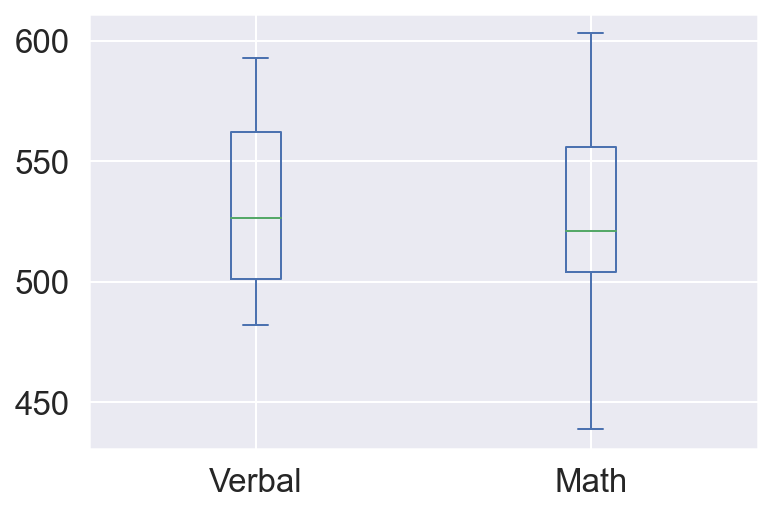

In [26]:
fig = plt.figure(figsize=(8, 4))
sats[['Verbal','Math']].plot.box();

The benefits of using a boxplot over a histogram or a scatterplot:

Compared to a stacked histogram, a boxplot is far easier to see trends in each individual distribution as the stacking can often make the visual slightly ambiguous

A box plot with give a visual representation of more than just the distribution of the data, it will also show the median, lower quartile, upper quartile as well as whiskers showing the quartiles +/- 1.5 times the IQR

They are often more simple to look at than scatter plots

However, boxplots won't show if there are numerous peaks or humps in the data like a histogram will


Rate has a completely different scale to Verbal and Math.  It's absolute max value is 100 (as it's a percentage) so it will negatively affect the way in which the graph can represent the data.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


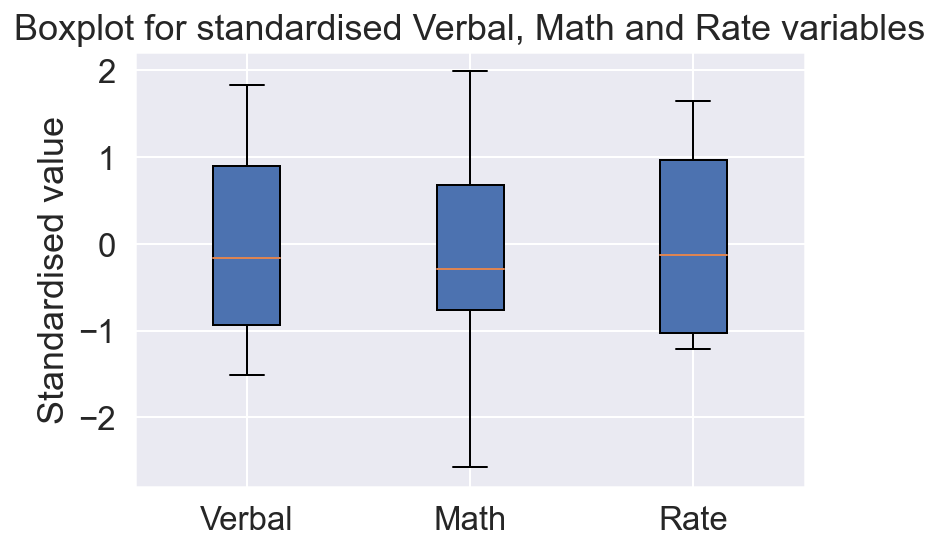

In [27]:
#standardise data?

def standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

verbalstand = standardized(sats.Verbal)
mathstand = standardized(sats.Math)
ratestand = standardized(sats.Rate)

plt.boxplot([verbalstand, mathstand, ratestand], patch_artist=True, labels = ['Verbal', 'Math', 'Rate'])
plt.title('Boxplot for standardised Verbal, Math and Rate variables')
plt.ylabel('Standardised value');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [28]:
sats.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [29]:
sats.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [30]:
#last row of DF looks like a more accurate mean of the full dataset as it is calculated by taking the mean of the entire sample.

#while .mean() or .describe() is calculated as the mean of the values in the dataframe, which are themselves averages of populations of varying sizes

In [31]:
sats.State[(sats.Verbal>506)]

0     CT
2     MA
4     NH
7     VT
9     VA
11    MD
17    OR
19    WA
22    AK
24    AZ
25    NV
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [32]:
len(sats[(sats.Verbal>506)])

36

36 of the 50 states have an average verbal score higher than the average score for the entire country.  This suggests that there is a large number of students in the remaining 14 states scoring below the average.  Indeed there is likely a larger group of students from those areas taking the sats than there are in some of the 36 states averaging above the national mean average score.  
This is supported when you consider that of the 36 states averaging above the national average, 22 have a rate of less than 20% taking the sats

In [33]:
sats[(sats.Verbal>506)&(sats.Rate<=20)]

,State,Rate,Verbal,Math
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572
37,MN,9,580,589
38,KS,9,577,580


In [34]:
len(sats[(sats.Verbal>506)&(sats.Rate<=20)])

22

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [35]:
#again taking the mean for the country from row 51
sats.State[(sats.Verbal>526)]

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [36]:
len(sats.State[(sats.Verbal>526)])

26

This is now just half of the states, as the median is far less affected by outliers than the mean average.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [37]:
sats['Difference'] = (sats['Verbal'] - sats['Math'])
sats.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [38]:
diff1 = sats.nlargest(10, 'Difference')
diff1.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [39]:
diff2 = sats.nsmallest(10, 'Difference')
diff2.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [40]:
sats[['Rate', 'Verbal', 'Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


There are 3 strong correlations:

Rate and verbal have a very strong, negative correlation.  Such that the higher the rate of participation of students in the state, the lower the average scores for that state

Similarly, rate and math have a very strong (though slightly weaker, -.77 compared to -.89 for verbal) correlation.  Again, the higher the rate of participation in the state, the lower the overall average scores for that state.

These two correlations may indicate that in the higher participation states almost all students take the sats, while in the lower participation states only those who are likely/expected to score higher take the tests.

Finally, the strongest correlation is between verbal and math - almost 0.9.  An incredibly strong positive correlation which shows that the higher the student's score in one test, the higher the likely score from the other and vice-versa

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [41]:
sats.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


count - This is the number of not-empty values for each column.  In this case there is no missing date as there are 52 rows in the df

mean - The mean average for all the values in this column.  A measure of central tendancy or middleness, it can give an idea of where the centre of the data lies.  For example the average participant rate of students in each state is 37%

std - The standard deviation.  A measure of how much, on average, values in this column differ from the mean.  A large standard deviation would indicate a large spread from the mean, while a small standard deviation would indicate that most of the values are close together

min - the minimum value.  This is the lowest value for that column.  For example, the lowest average verbal score for any state was 482

25% - The 25th percentile - also known as the lower quartile, 25% of the values occur below this value and 75% above it.  For example, 25% of the 50 states in the dataframe have a participation rate of 9% or lower suggesting not only a lot with low participation rate but also a large number of states with a similar value.

50% - The 50th percentile - this is the median, another measure of central tendancy/middleness.  Compared to the mean value, it is less skewed by significant (very high or very low) outliers.  

75% - The 75th percentile - the upper quartile, 75% of values occur below this value and 25% above it.  50% of the values will occur between this and the 25th percentile.  As in the difference column, where, despite a relatively large range of 125, 50% of the values occur between -6 and 4.25, so a range of 10.25.  When you consider that 25% of the observations are between 4.25 and 95, it shows that there are a few significant outliers on the higher end

max - the maximum value, the highest for that column.  Subtracting the minimum value from this will give the range for the column.  It also allows us to compare the highest scores for each test, so we can see that math had both the lowest average score for a state and the highest

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [42]:
sats[['Rate', 'Verbal', 'Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


Both measure how much certain variables are related to each other, however correlation takes into account the variation (through standard deviation) of each variable, independant of the other

Correlation can be calculated by dividing the covariance by the product of the two variable's correlation

Because it correlation takes into account the variation of each variable and outputs values between -1 and 1, it is far easier to use correlation matrices than covariance matrices.  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [43]:
drugs = pd.read_csv("/Users/jonathanyirrell/Desktop/GA/DSI25-lessons/projects/project-2/drug-use-by-age.csv")
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [44]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [45]:
#cocaine frequency, meth-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency all coded as object, expected float
#age coded as object, likely as many are ranges

In [46]:
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [47]:
drugs['inhalant-frequency'].unique()

array(['19.0', '12.0', '5.0', '5.5', '3.0', '4.0', '2.0', '3.5', '10.0',
       '13.5', '-'], dtype=object)

In [48]:
drugs['crack-frequency'].unique()

array(['-', '3.0', '9.5', '1.0', '21.0', '10.0', '2.0', '5.0', '17.0',
       '6.0', '15.0', '48.0', '62.0'], dtype=object)

In [49]:
drugs[(drugs['crack-frequency']== '-')]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [50]:
drugs['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [51]:
drugs.isna().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [52]:
#looks like no missing values as dashes indicate zero because usage for corresponding drug is zero.
#let's convert these columns into floats to allow better analysis

def convert_to_float(x):
    try:
        return(float(x))
    except:
        return(np.nan)

drugs['cocaine-frequency']= drugs['cocaine-frequency'].apply(convert_to_float)
drugs['crack-frequency'] = drugs['crack-frequency'].apply(convert_to_float)
drugs['heroin-frequency'] = drugs['heroin-frequency'].apply(convert_to_float)
drugs['inhalant-frequency'] = drugs['inhalant-frequency'].apply(convert_to_float)
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].apply(convert_to_float)
drugs['meth-frequency'] = drugs['meth-frequency'].apply(convert_to_float)

In [53]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [54]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [55]:
drugs.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [56]:
#age is non-numerical.  Make numerical by adding a column and changing ranges to mid-range age

drugs['age1'] = drugs['age']

In [57]:
drugs['age1'] = drugs['age1'].replace(['22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], [22.5, 24.5, 27.5, 32, 42, 57, 65])
drugs['age1']= drugs['age1'].apply(convert_to_float)
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age1
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0,27.5
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,32.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0,42.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0,57.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,NaN,0.0,NaN,...,NaN,0.2,5.0,0.0,364.0,0.0,NaN,0.0,15.0,65.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [59]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353,25.617647
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527,15.356726
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,12.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000,16.000000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000,20.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000,27.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000,65.000000


In [60]:
drugs['alcohol-frequency'].unique()

array([ 3.,  6.,  5., 10., 13., 24., 36., 48., 52.])

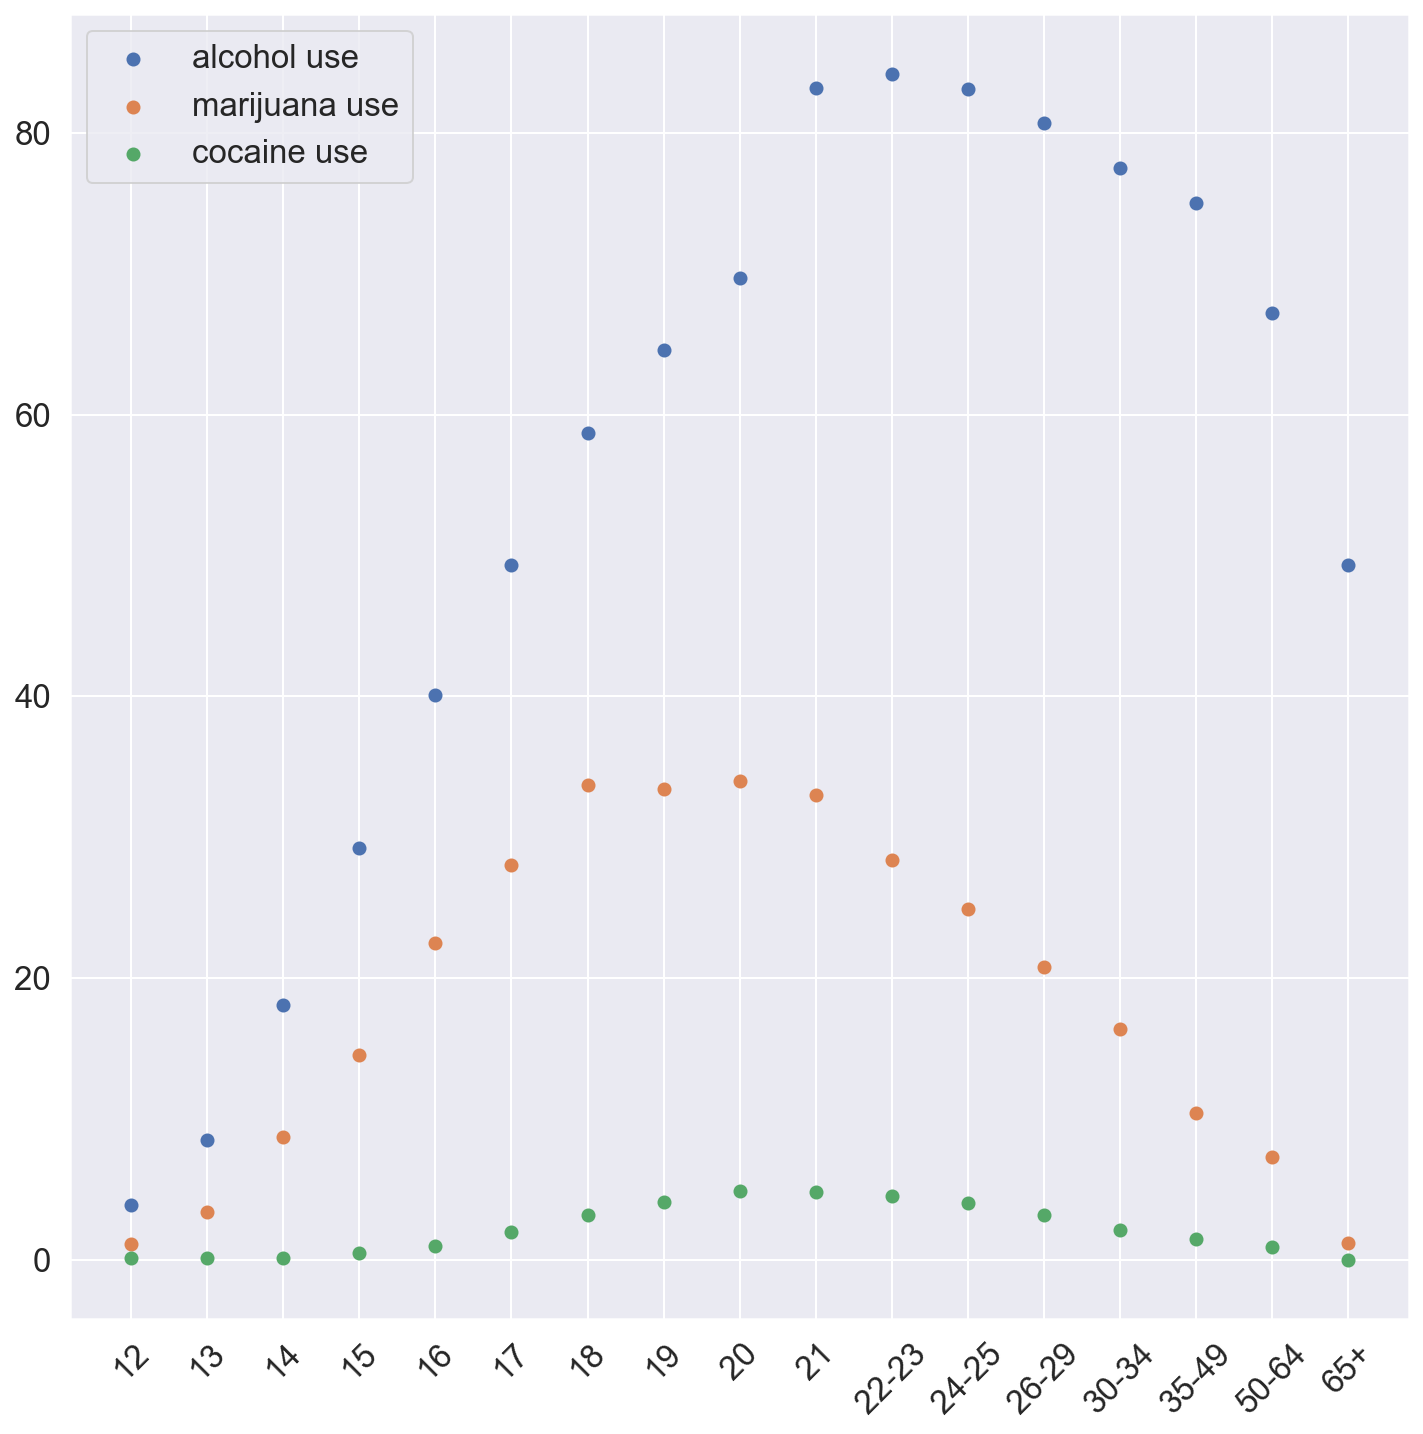

In [61]:
#are there any trends in usage of the first 3 drugs and age?
fig = plt.figure(figsize =(12,12))
plt.scatter(data=drugs, x="age", y="alcohol-use")
plt.xticks(rotation = 45)
plt.scatter(data=drugs, x="age", y='marijuana-use')
plt.scatter(data = drugs, x = "age", y = 'cocaine-use')
plt.legend(['alcohol use', 'marijuana use', 'cocaine use'])

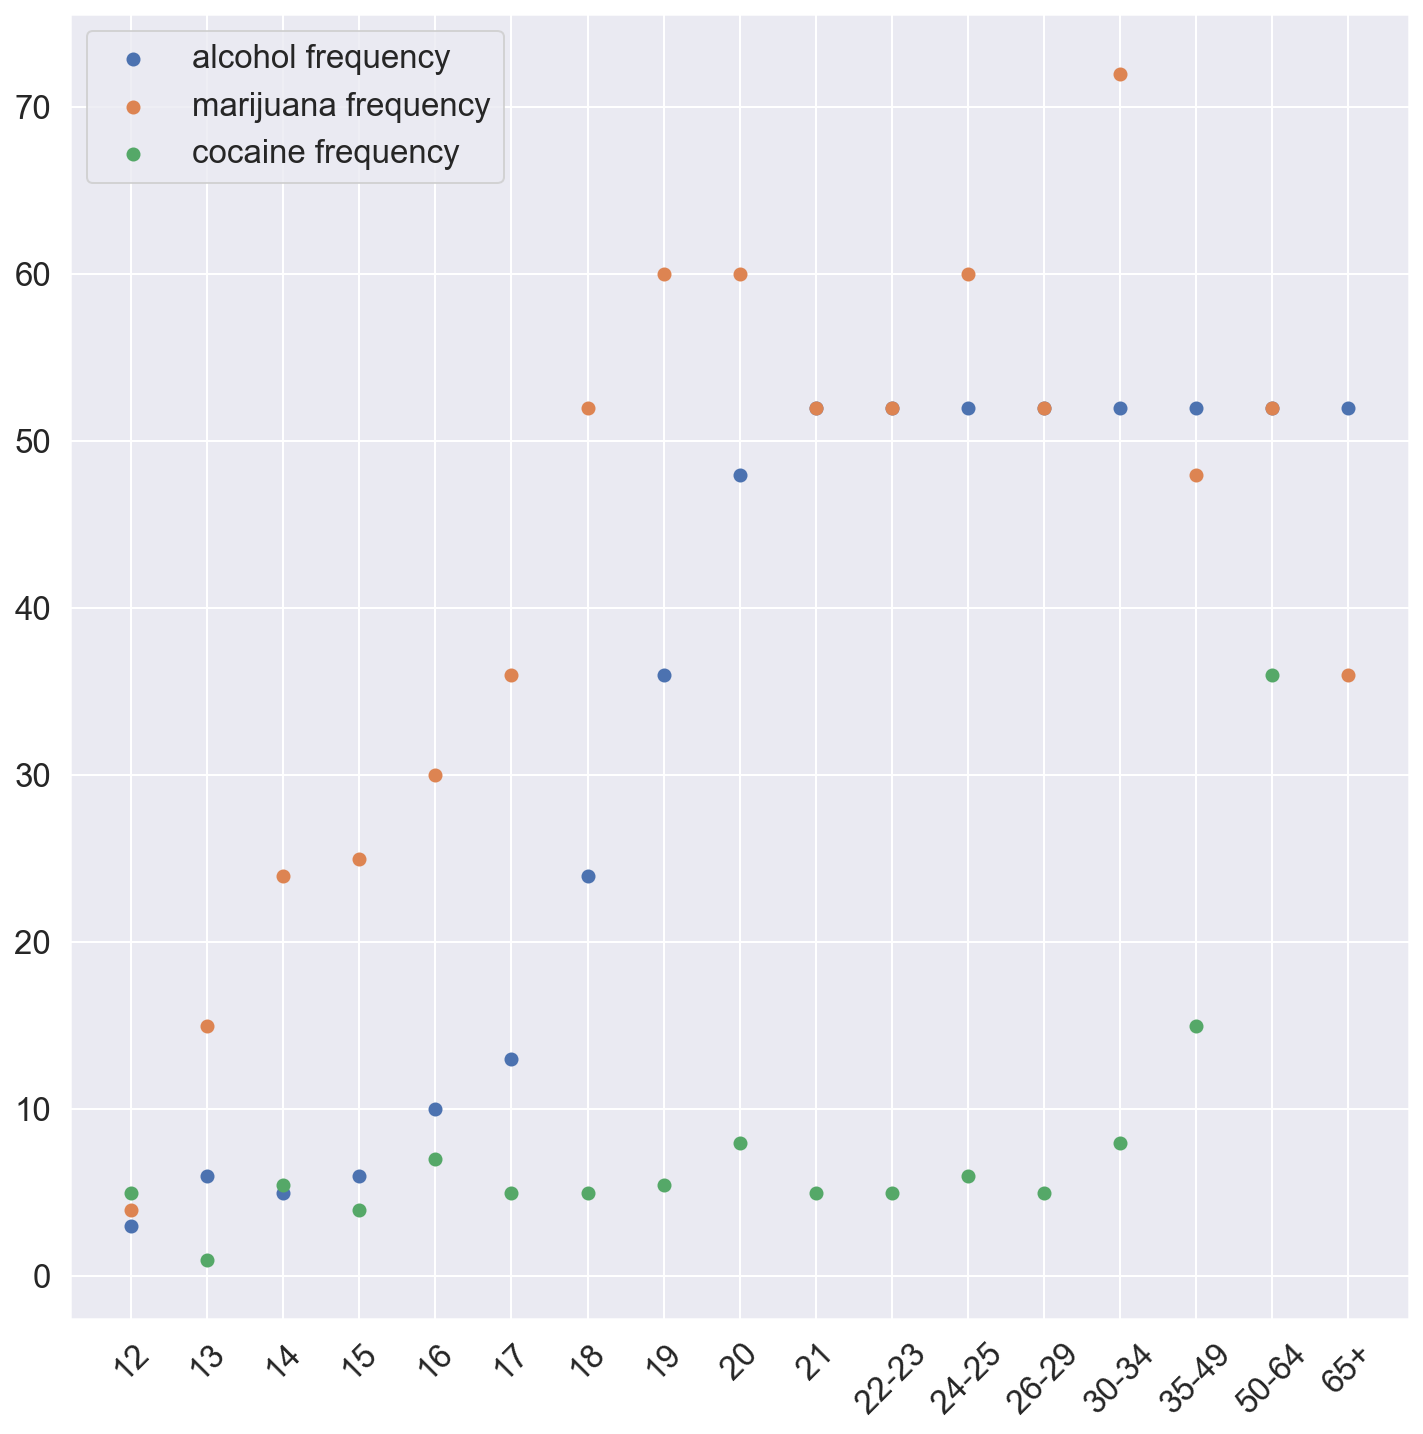

In [62]:
#are there any trends in frequency of the first 3 drugs and age?
fig = plt.figure(figsize =(12,12))
plt.scatter(data=drugs, x="age", y="alcohol-frequency")
plt.xticks(rotation = 45)
plt.scatter(data=drugs, x="age", y='marijuana-frequency')
plt.scatter(data = drugs, x = "age", y = 'cocaine-frequency')
plt.legend(['alcohol frequency', 'marijuana frequency', 'cocaine frequency']);

In [63]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age1'],
      dtype='object')

In [65]:
#create 2 subsets - usage and frequency:

druguse = drugs.iloc[:,::2]
druguse.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,age1
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,12.0
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,13.0
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,14.0
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,15.0
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,16.0


In [66]:
drugfreq = drugs.drop("n", axis = 1).iloc[:,::2]
drugfreq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [67]:
druguse.drop('age1', axis = 1, inplace=True)
druguse.mean()

/var/folders/bm/2w01_g15327_2drgpr6m5jrm0000gn/T/ipykernel_15162/3252488355.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  druguse.mean()


alcohol-use          55.429412
marijuana-use        18.923529
cocaine-use           2.176471
crack-use             0.294118
heroin-use            0.352941
hallucinogen-use      3.394118
inhalant-use          1.388235
pain-releiver-use     6.270588
oxycontin-use         0.935294
tranquilizer-use      2.805882
stimulant-use         1.917647
meth-use              0.382353
sedative-use          0.282353
dtype: float64

/var/folders/bm/2w01_g15327_2drgpr6m5jrm0000gn/T/ipykernel_15162/2105576698.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  druguse.mean().plot(kind='bar', ax = ax[0])
/var/folders/bm/2w01_g15327_2drgpr6m5jrm0000gn/T/ipykernel_15162/2105576698.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drugfreq.mean().plot(kind='bar', ax = ax[1])


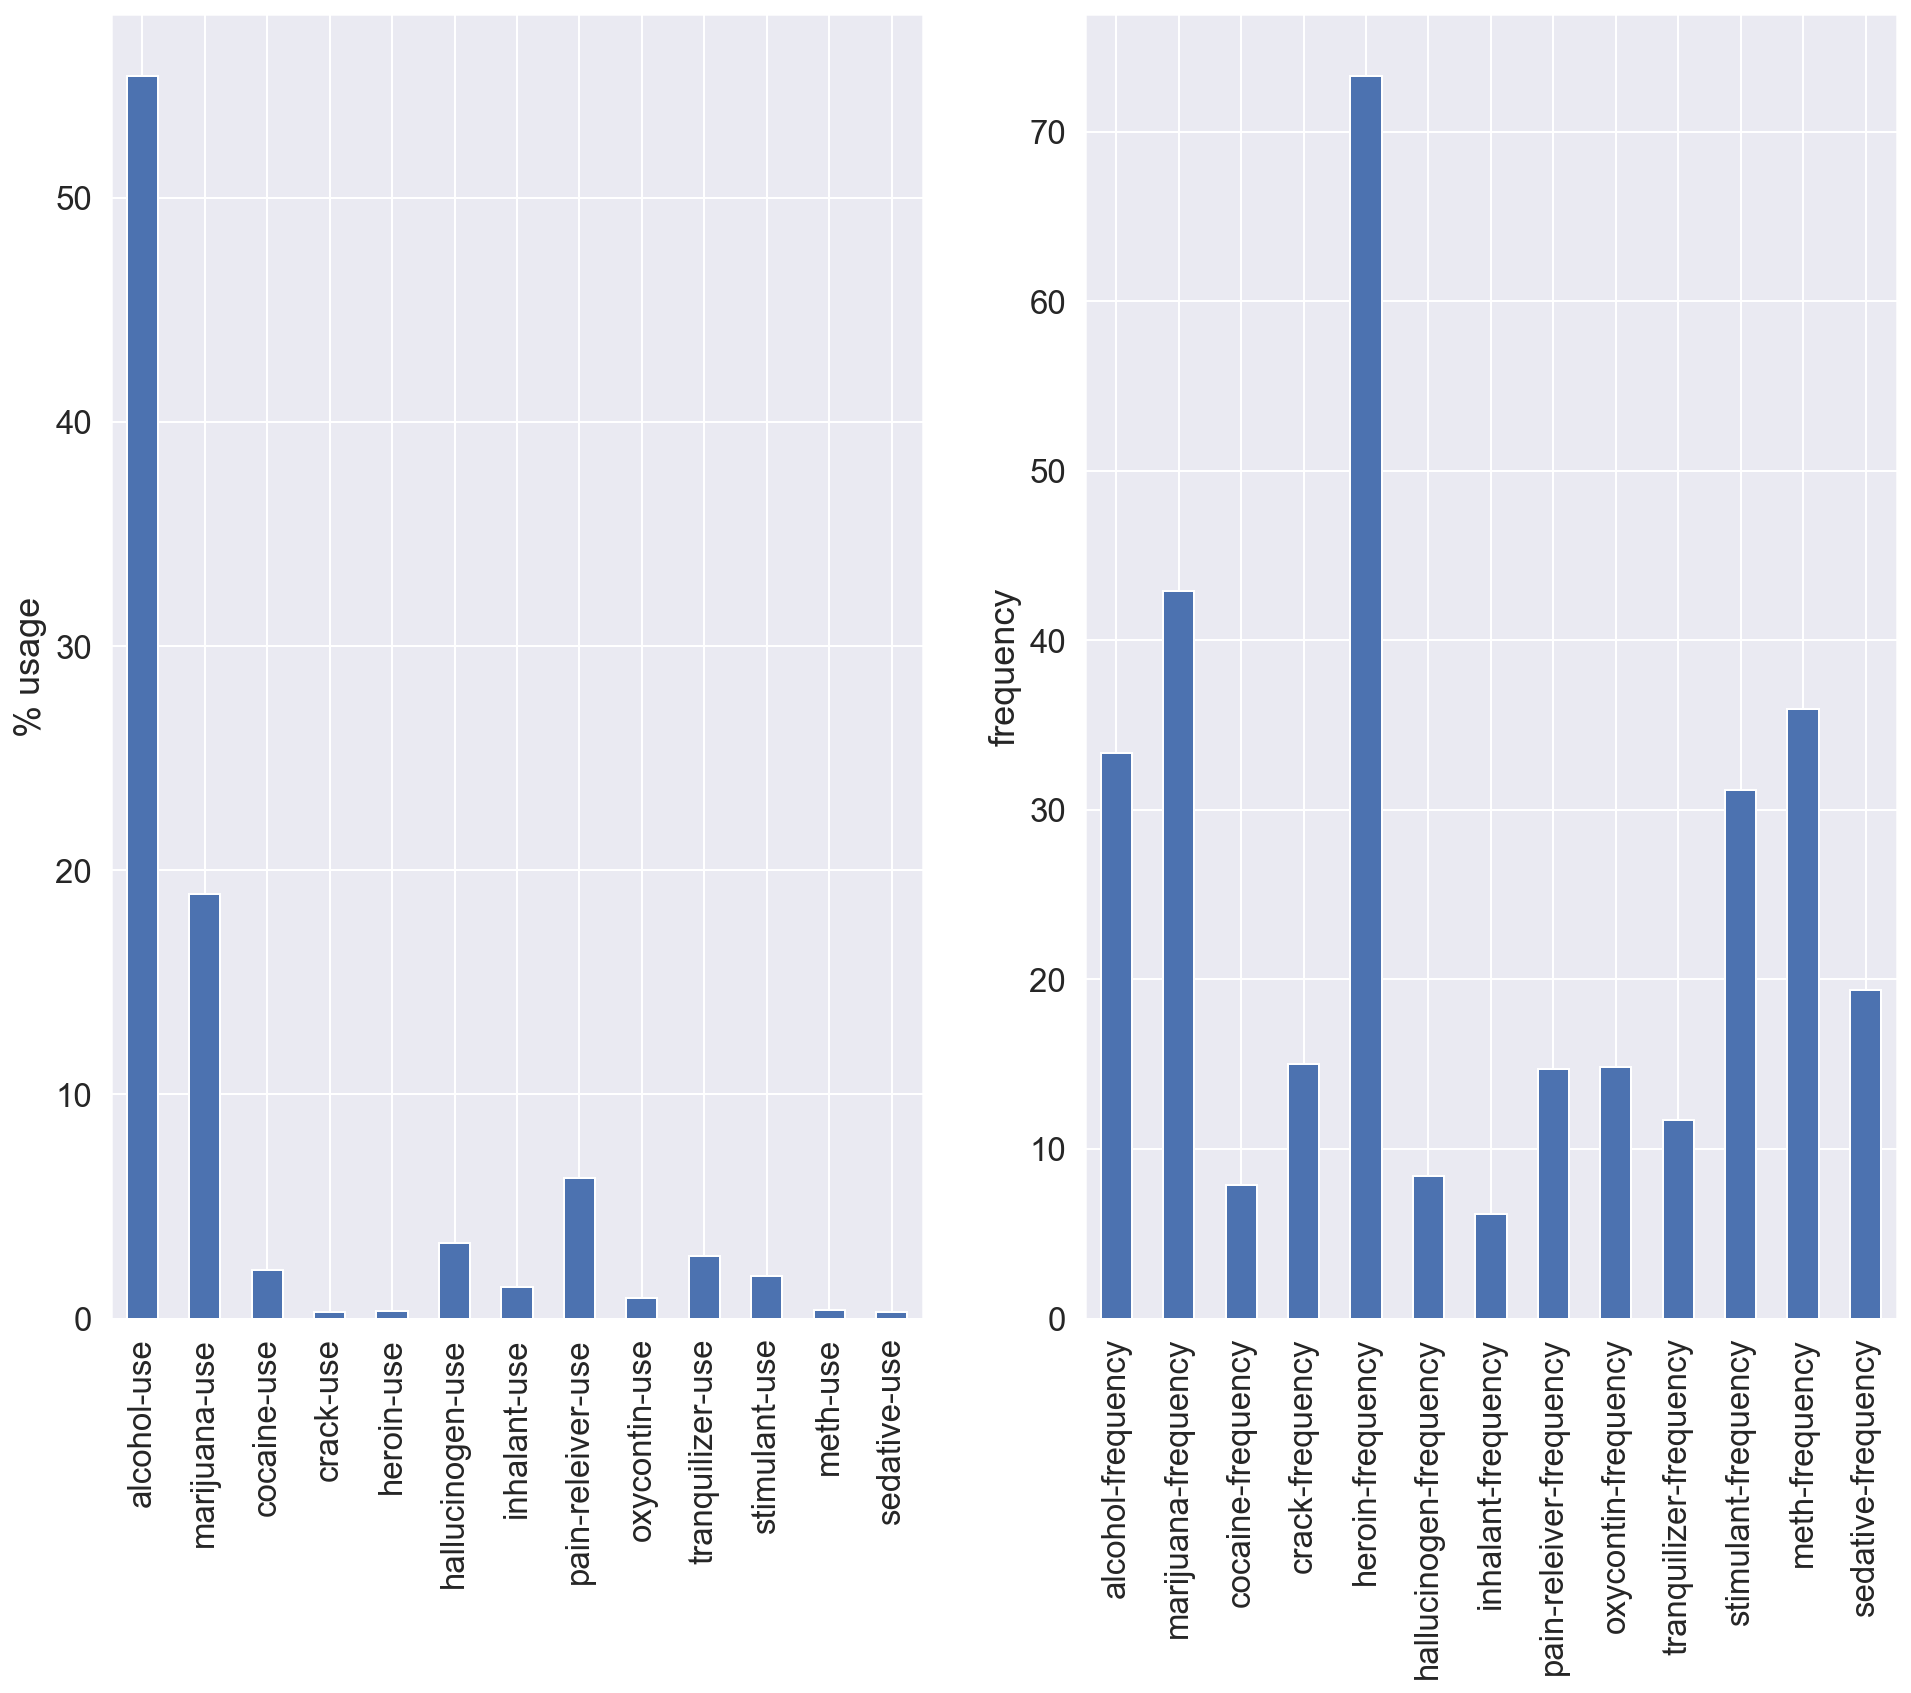

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (16,12))

druguse.mean().plot(kind='bar', ax = ax[0])
ax[0].set(ylabel='% usage')
drugfreq.mean().plot(kind='bar', ax = ax[1])
ax[1].set(ylabel='frequency');

In [72]:
druguse['mean_usage'] = druguse.iloc[:,1::].mean(axis=1)
druguse.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,mean usage,mean_usage
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,0.746154,0.746154
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,1.415385,1.415385
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,2.884615,2.884615
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,4.584615,4.584615
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,6.315385,6.315385


In [75]:
druguse.tail()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,mean_usage
12,26-29,80.7,20.8,3.2,0.4,0.6,3.2,0.6,8.3,1.2,4.2,2.3,0.6,0.4,9.730769
13,30-34,77.5,16.4,2.1,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4,8.592308
14,35-49,75.0,10.4,1.5,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3,7.376923
15,50-64,67.2,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2,6.261538
16,65+,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0,3.953846


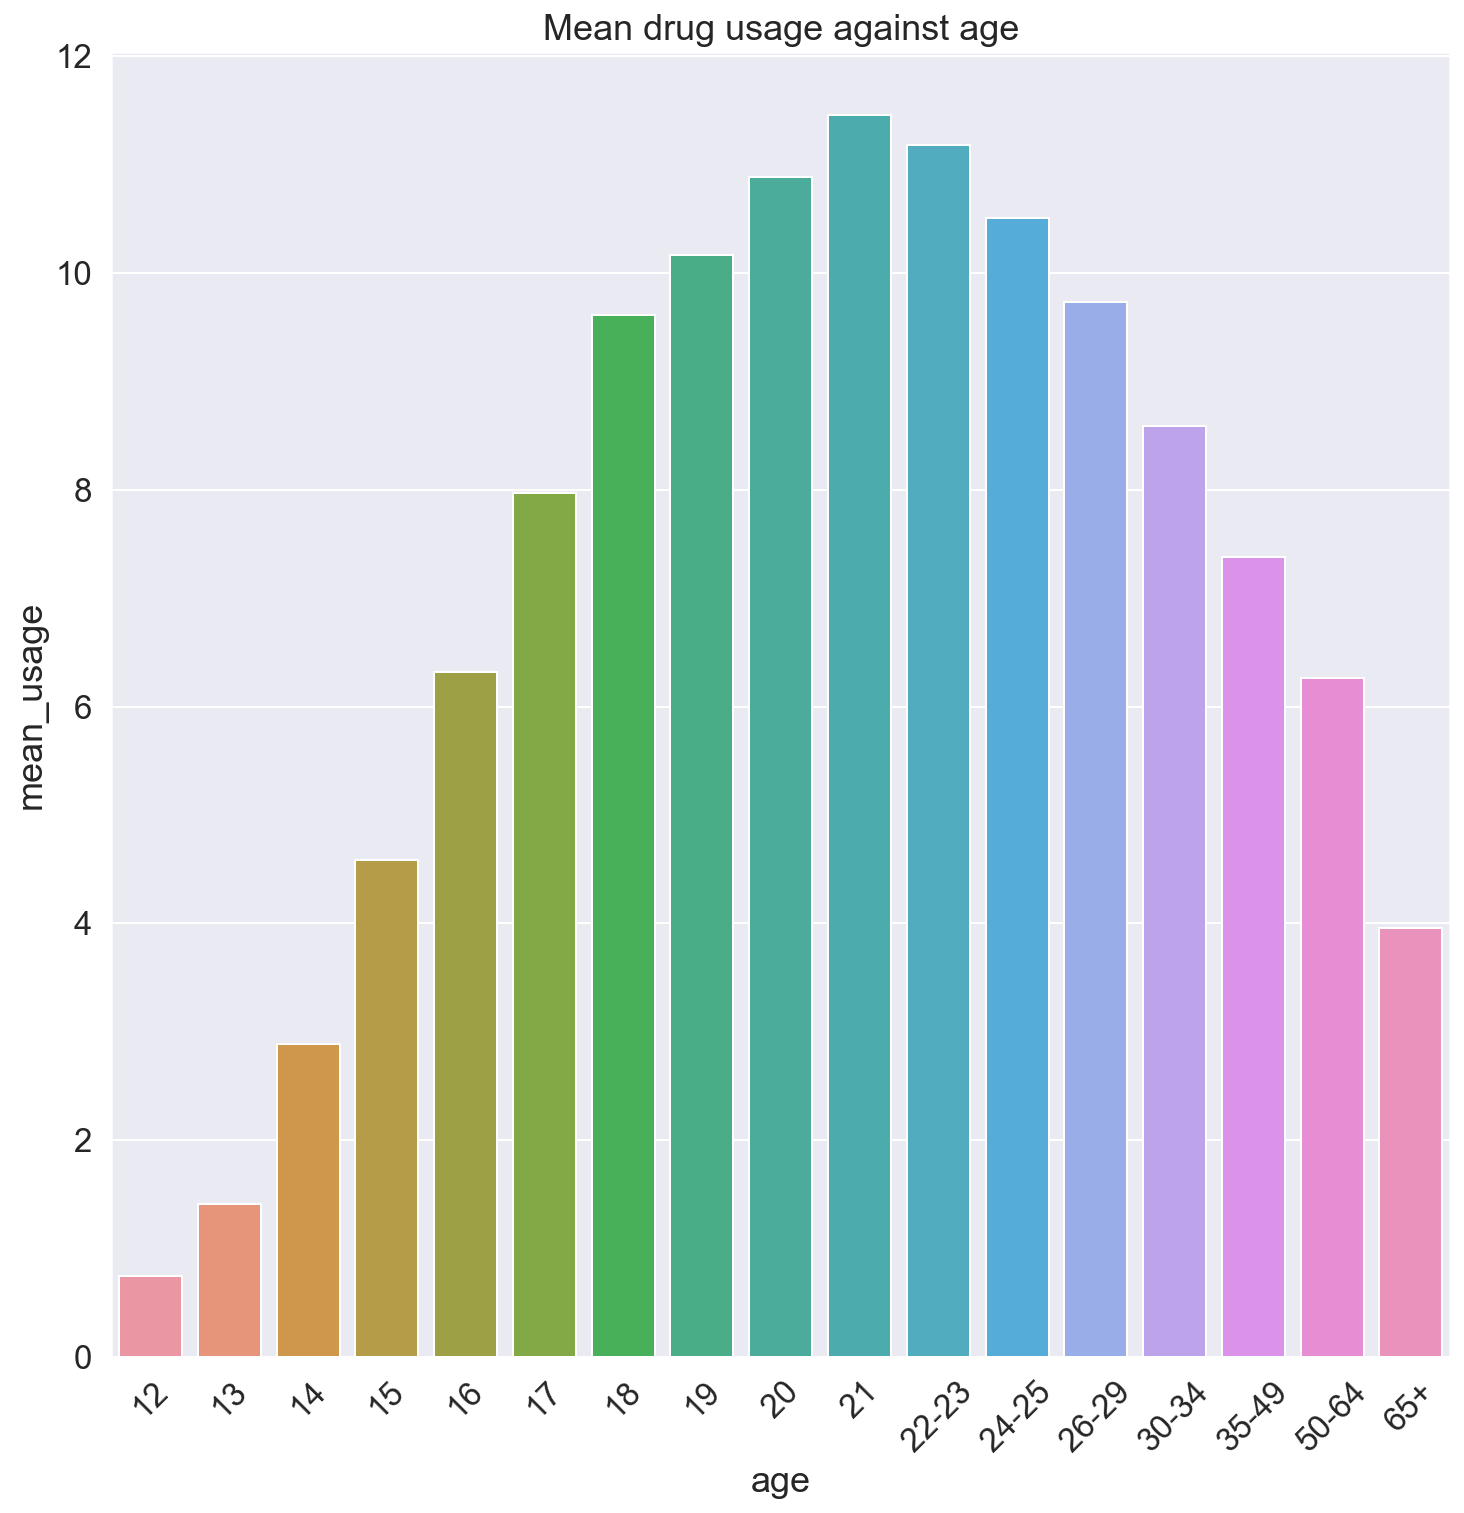

In [87]:
fig, ax = plt.subplots(figsize = (12,12))
plt.xticks(rotation = 45)
plt.title('Mean drug usage against age')
sns.barplot(data = druguse, x = 'age', y = 'mean_usage');

In [93]:
drugfreq['mean_frequency'] = drugfreq.iloc[:,1::].mean(axis=1)
drugfreq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,mean_frequency
0,12,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0,20.562179
1,13,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0,11.762722
2,14,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5,9.337278
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0,8.827473
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0,14.093956


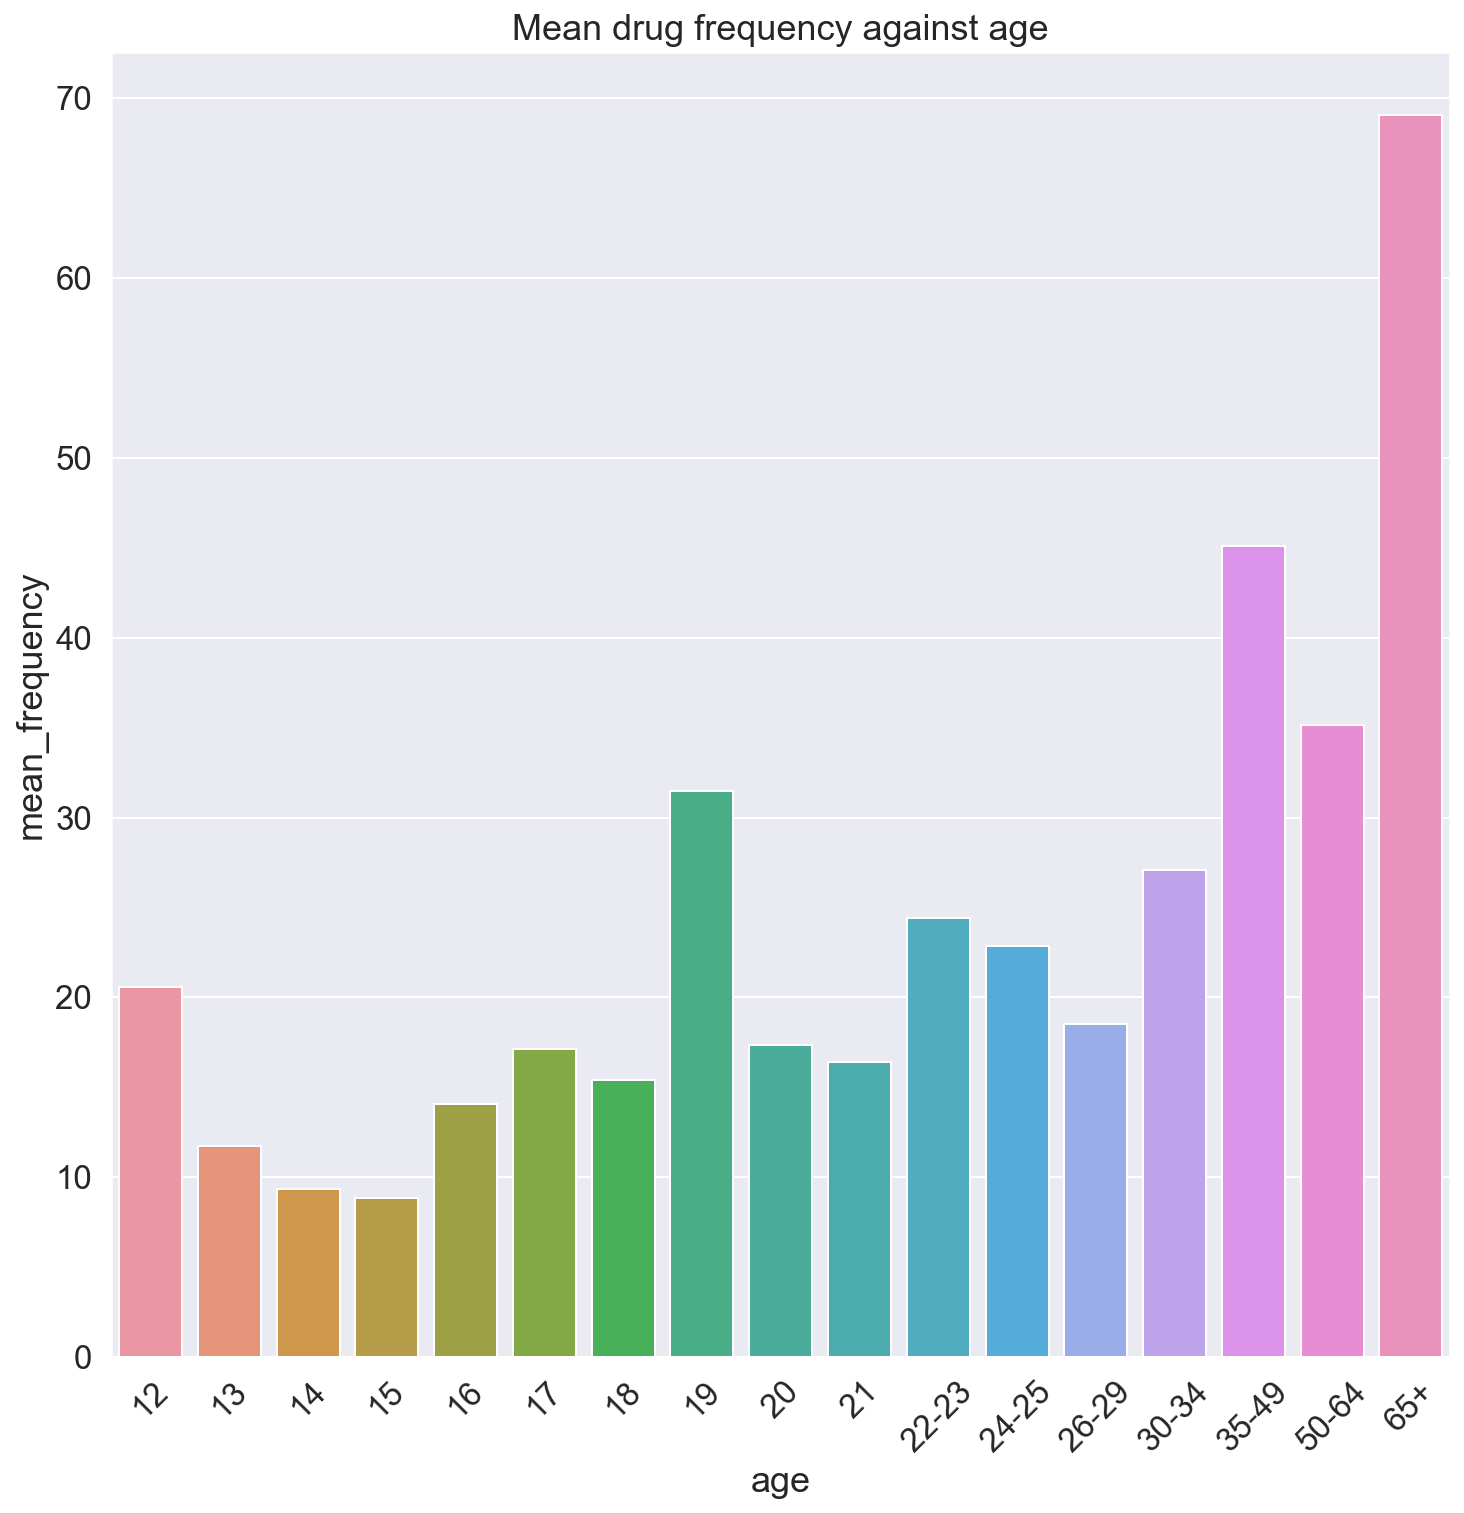

In [94]:
fig, ax = plt.subplots(figsize = (12,12))
plt.xticks(rotation = 45)
plt.title('Mean drug frequency against age')
sns.barplot(data = drugfreq, x = 'age', y = 'mean_frequency');

In [95]:
druguse.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,mean_usage
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268,0.907428
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766,0.874803
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914,0.936301
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421,0.858879
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649,0.803199
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700,0.779357
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611,-0.325201
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666,0.881196
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929,0.862500
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618,0.934560


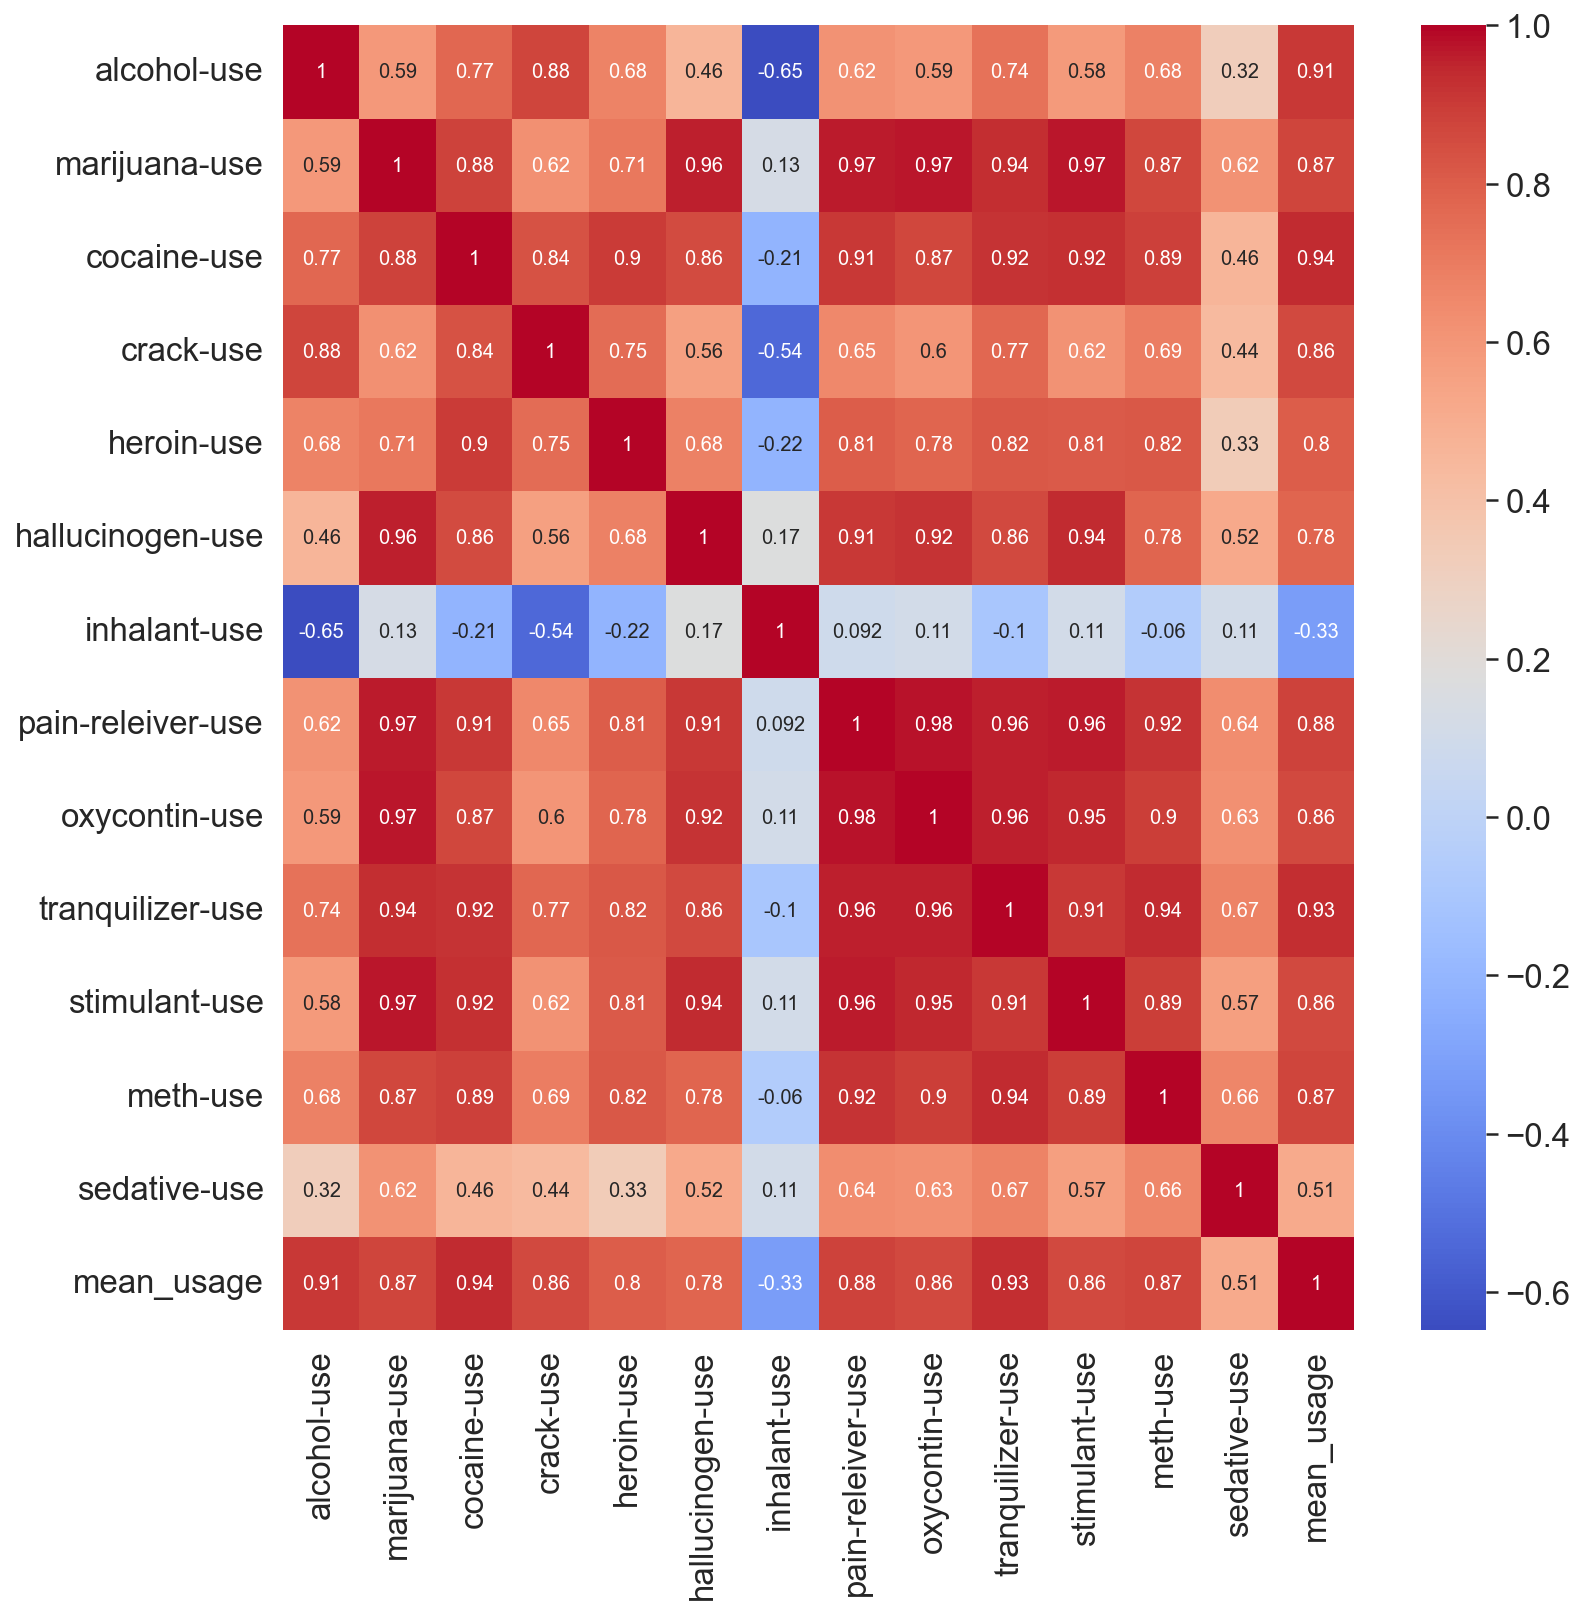

In [99]:
plt.figure(figsize = (12,12))
sns.heatmap(druguse.corr(), annot = True, cmap = 'coolwarm')
plt.show()

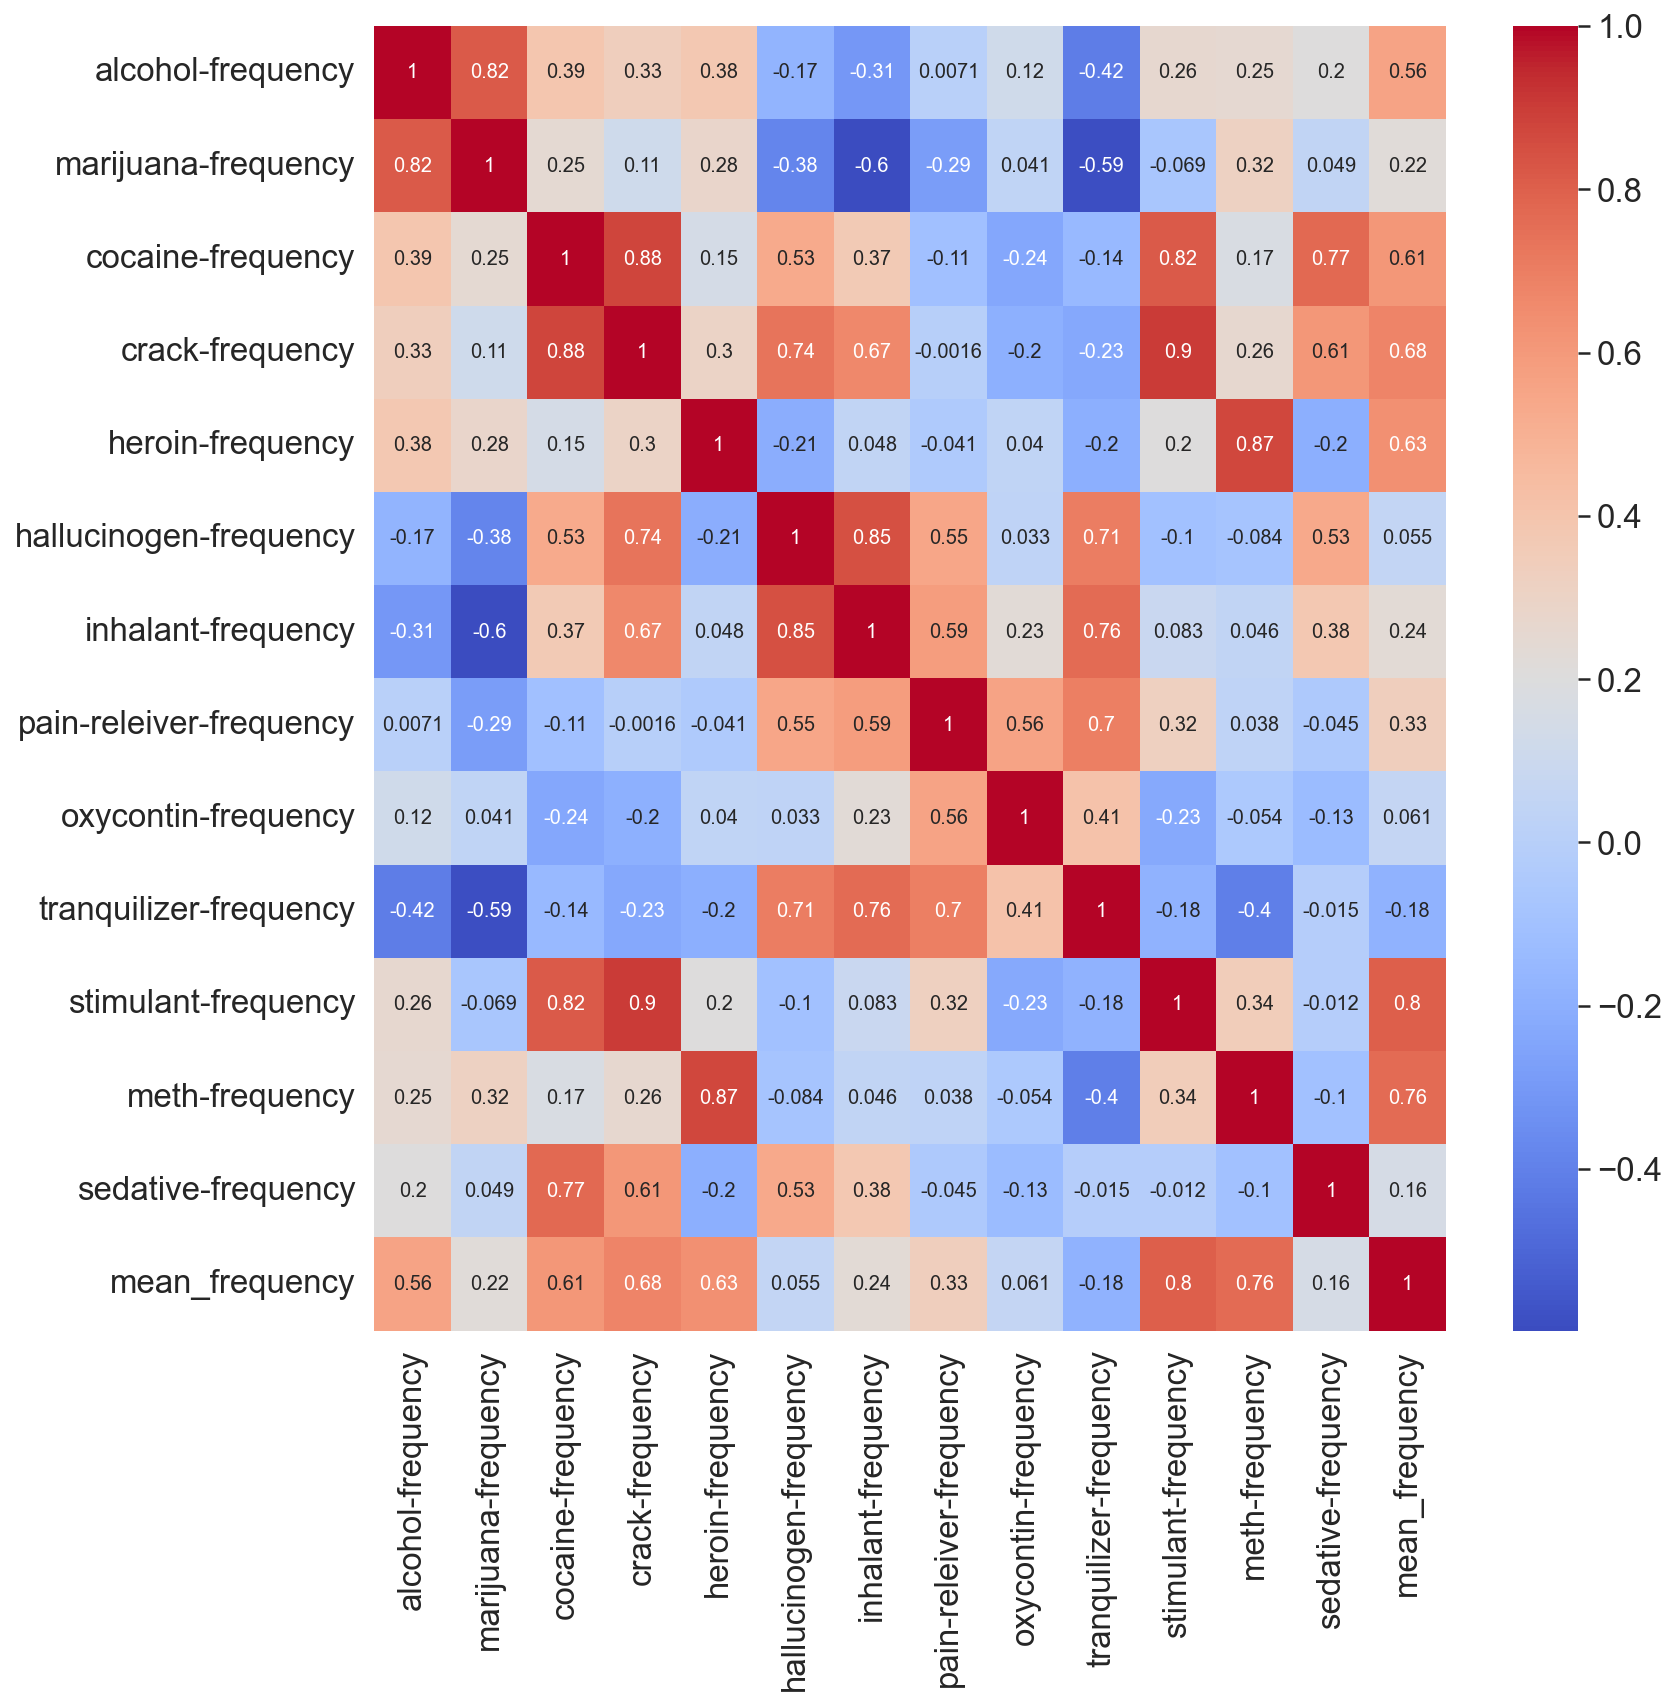

In [98]:
plt.figure(figsize = (12,12))
sns.heatmap(drugfreq.corr(), annot = True, cmap = 'coolwarm')
plt.show()

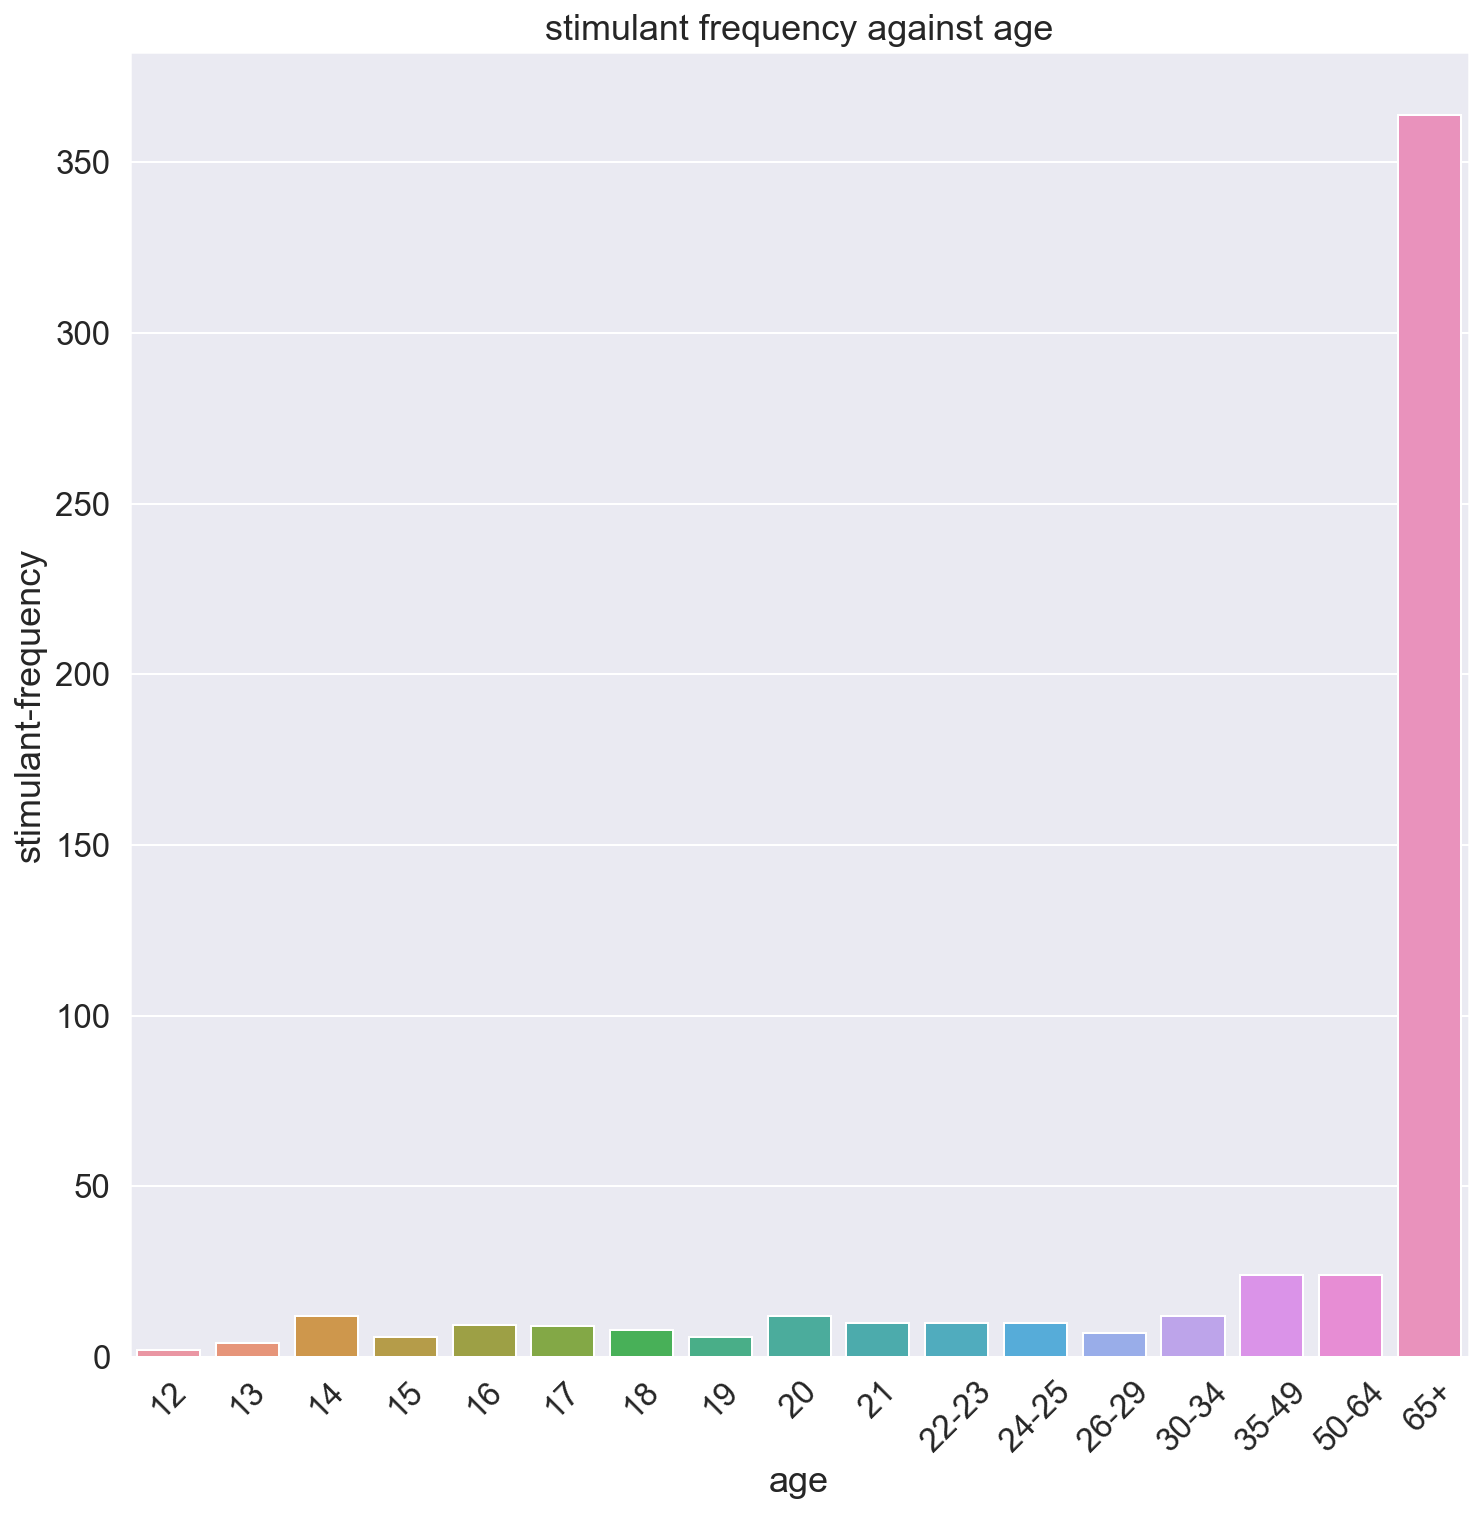

In [100]:
#stimulant has relatively low usage percentage (under 2%) but frequency has very high max and high std
fig, ax = plt.subplots(figsize = (12,12))
plt.xticks(rotation = 45)
plt.title('stimulant frequency against age')
sns.barplot(data = drugfreq, x = 'age', y = 'stimulant-frequency');

In [102]:
#all over 65? How many over 65s said they used stimulants?

drugs['stimulant-use'][(drugs['age']=='65+')]

16    0.0
Name: stimulant-use, dtype: float64

In [ ]:
#is this one person who uses stimulants every day (or at least every day of the year bar one - takes their birthday off?)

What can we infer from the EDA?

Almost all the drugs in the dataset seem to have a positive correlation with the other drugs, at least as far as number of people reporting using them.  The only one that seems to buck this trend is inhalant usage, which seems to have either a low or negative correlation with the other drugs.  This suggests that it may be a drug that is unrelated to others and has little or no cause/effect relationship.

With regards to frequency of usage, there seems to be very few, if any, positive correlations.

Within the ages, 18-25 in particular seem to be the most likely to use drugs.  In that on average, more people in these age ranges report using drugs than in any other age groups.  The distribution of the data is very unimodal in this respect, suggesting that people are more likely to try drugs in this age range and less likely outside of it.  This could be due to the effects of university/college and then the effects of 'growing up'; families, professional life and growing out of it.

That said,frequency of usage is highest in over 65s (and the next two oldest age groups are 2nd and 3rd!).  So while fewer people over 65 surveyed use drugs than those in their late teens/early 20s, they used them more often in their 60s.  This could be an effect of being retired with a greater opportunity to have a drink, or as a technique of dealing with pain caused by age, wear and tear.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Is the greater frequency of drug usage in over 65s caused by drinking more alcohol?
Hypothesis - over 60s drink alcohol more frequently than other age groups
Null hypothesis - over 60s do not drink alcohol more frequently than other age groups


Deliverables:
Is there a correlation between frequency of alcohol consumption and over 65s?  If so, how great is it?  Is it any different to other age groups?
...

In [108]:
drugs[['age1', 'alcohol-frequency']].corr()

,age1,alcohol-frequency
age1,1.000000,0.642166
alcohol-frequency,0.642166,1.000000


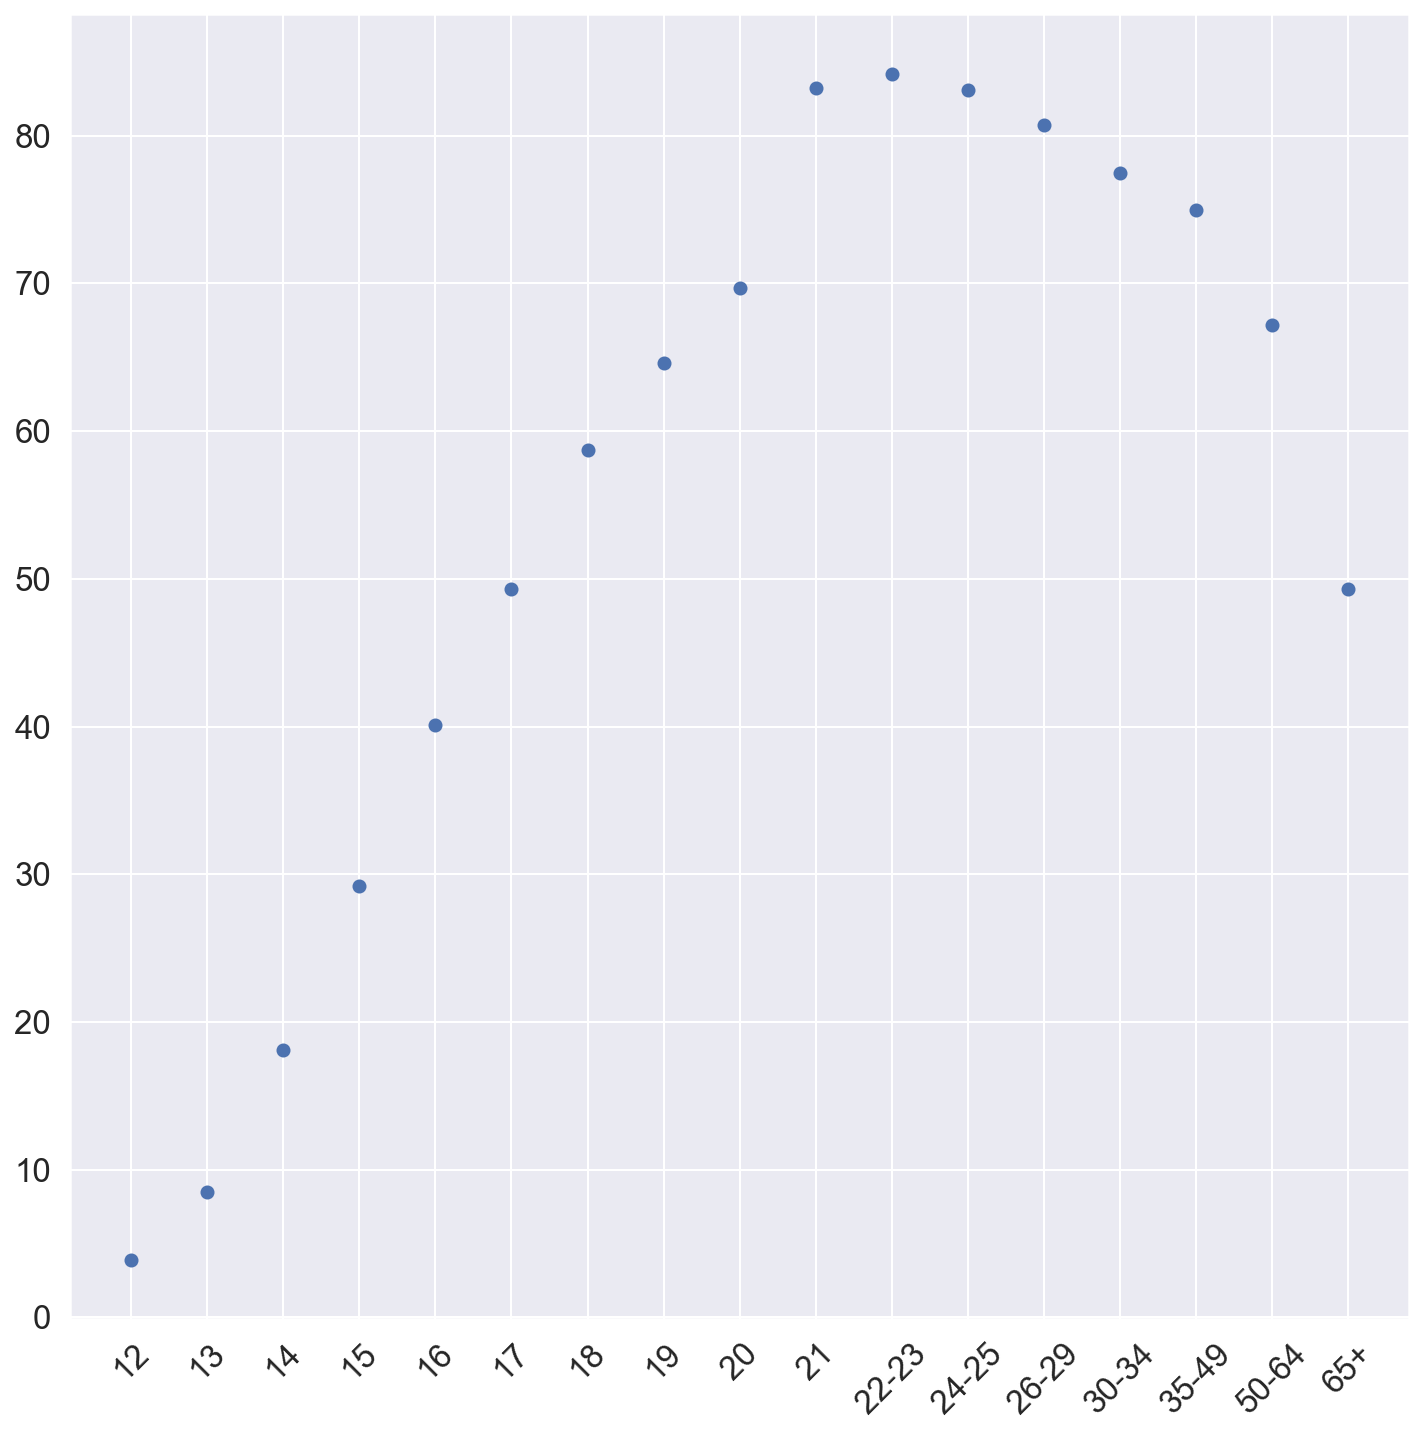

In [109]:
fig = plt.figure(figsize =(12,12))
plt.scatter(data=drugs, x="age", y="alcohol-use")
plt.xticks(rotation = 45);

**Report**

There is a positive correlation of .64 between age and alcohol frequency. However, this is likely due to the increase in frequency of alcohol consumption that occurs up to age 21 (when alcohol becomes far more accessible in all states.
Off all age groups over 18, over 65s show the lowest frequency of alcohol consumption.

This would indicate that there is no data to disprove the null hypothesis.
...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
print(sats.Rate)



In [ ]:
sats.Rate.describe()

Outliers are generally less than LQ - (1.5*IQR) or above UQ + (1.5*IQR).  Since IQR is 54.5; 25% is 9 and 75% is 63.5, there are no outliers in rate

In [ ]:
sats.describe()

Verbal - IQR: 562 - 501 = 61.  501 - (1.5*61) = 409.5; 562+91.5 = 653.5.  Outliers would be less than 409.5 and more than 653.5 (no outliers)

Math - IQR = 555.75-504 = 51.75; 504-(1.5*51.75) = 426.375; 555.75 + (1.5*51.75) = 633.375.  Outliers would be greater than 633.375 or less than 426.375 (no outliers)

Difference - IQR = 4.25 - -6 = 10.25; -6 - (1.5*10.25) = -21.375, 4.25+(1.5*10.25) = 19.75
Outliers are greater than 19.75 and less than -21.375

In [ ]:
#print outliers in difference
sats[(sats.Difference < -21.375) | (sats.Difference > 19.75)]

In [ ]:
satsclean = sats[(sats.Difference > -21.375) & (sats.Difference < 19.75)]
satsclean.describe()

In [ ]:
sats.describe()

Mean - The mean for Maths and Verbal have both increased slightly - more significanlty for Math; while the average Rate has decreased as has the average difference between math and verbal for each state.  The mean difference probably has the most significant change of the three, going from slightly positive to slightly negative.

Median - the only median to change is in Math, likely because of the two states removed from the dataframe, one was above the median in verbal and one was below.  Likewise for Difference, one was a high positive difference and the other had a high negative difference.  So removing both of these rows had no effect on the medians.  However both rows would have had math values below the median, causing it to increase once cleaned.

Standard Deviation - The standard deviation for both rate and verbal increased only on a decimal level - likely because the removed values were not the highest or lowest values.  However we have effectively removed the lowest maths score from the new dataset, causing a reduction in the standard deviation for math.  Whereas in difference the two greatest (highest positive and lowest negative) values have been removed, reducing the range of the values and as such the standard deviation  

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.